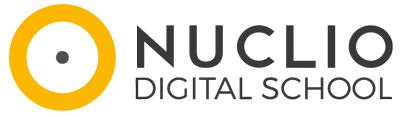


# **Modulo 4. Análisis de datos - Proyecto final**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024


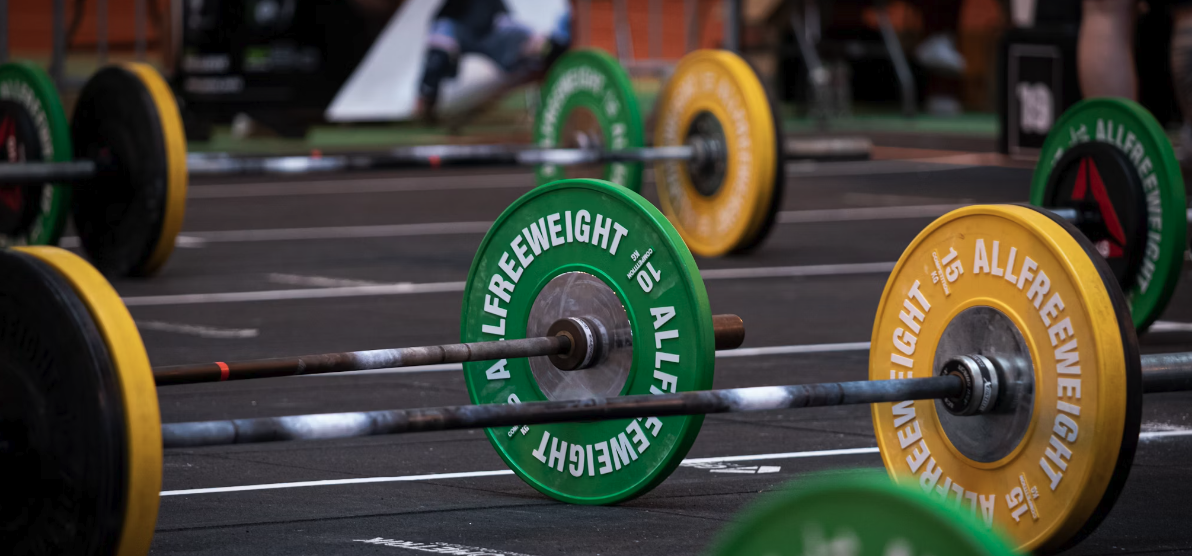

# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import re

## Paso 2. Cargar datos

In [2]:
df_2019 = pd.read_csv (r'C:\Users\santi\Desktop\ESTADISTICA\clase\ENTREGABLE_LARA\Campeonato Europeo de Halterofilia de 2019 datos original - copia.csv')
df_2020 = pd.read_csv (r'C:\Users\santi\Desktop\ESTADISTICA\clase\ENTREGABLE_LARA\Campeonato Europeo de Halterofilia de 2020 datos original - copia.csv')

## Paso 3. Exploración inicial

 ###  Función que automatiza la exproración inicial de un data frame, juntando en un mismo bloque de código, los principales métodos para analizar un conjunto de datos

In [3]:
def check_df(df, tipo=''):
    if tipo == 'simple':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cuáles son las variables numéricas?")
        df_numericas = df.select_dtypes(include = 'number')
        columnas_numericas = list(df_numericas.columns)
        print(columnas_numericas)
        print('\n########################################################################################')

        print("¿Cuáles son las variables categóricas?")
        df_categoricas = df.select_dtypes(include = 'object')
        columnas_categoricas = list(df_categoricas.columns)
        print(columnas_categoricas)
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        if len(columnas_numericas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
            display(df.describe(include = 'number'))
            print('\n########################################################################################')

        if len(columnas_categoricas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?")
            display(df.describe(include = 'object'))

 ## función para identificar valores problemáticos

In [4]:
def id_valores_problem(df, columnas=[]):
    print('###################################################################################')
    print('3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:')
    print(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False))
    print('###################################################################################')
    print(f'3.1.2. Número de DUPLICADOS totales: {df.duplicated().sum()}')
    print('###################################################################################')
    if len(columnas) > 0:
        print(f'3.1.2. Número de DUPLICADOS parciales según las columnas {columnas}: {df.duplicated(subset=columnas).sum()}')
        print('###################################################################################')
    df_numericas = df.select_dtypes(include = 'number')
    columnas_numericas = list(df_numericas.columns)
    if len(columnas_numericas) > 0:
        print('3.1.3. Columnas numéricas con OUTLIERS')
        for var in columnas_numericas:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            limite_inferior = Q1 - 1.5 * (Q3 - Q1)
            limite_superior = Q3 + 1.5 * (Q3 - Q1)
            outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]
            print(f'Número de outliers en la columna "{var}": {outliers.shape[0]}')
        print('###################################################################################')

In [5]:
#check_df(df_2019)
#check_df(df_2020)

In [6]:
id_valores_problem(df_2019)
id_valores_problem(df_2020)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "Año": 0
###################################################################################
###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64
###################################################################################
3.1.2. Núm

## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

In [7]:
### Concatenamos los 2 dataframes, en este caso es sencillo porque possuen las mismas columnas

df_ = pd.concat([df_2019, df_2020], ignore_index=True)
df_.head()
df_.shape

(40, 6)

In [8]:
# limpiamos valores no deseados como [n1]

columnas_a_limpiar = ["Oro", "Plata", "Bronce"]

for columna in columnas_a_limpiar:
    df_[columna] = df_[columna].astype(str)
    df_[columna] = df_[columna].apply(lambda x: re.sub(r"\[n 1\]\u200b?", "", x))

print(df_.head())


         Eventos                                          Oro  \
0  55 kg (06.04)     Mirco Scarantino Italia  116 + 145 = 261   
1  61 kg (07.04)  Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)     Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)   Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)   Antonino Pizzolato Italia  155 + 201 = 356   

                                         Plata  \
0       Anguel Rusev Bulgaria  110 + 146 = 256   
1      Bünyamin Sezer Turquía  132 + 151 = 283   
2   Simon Brandhuber Alemania  146 + 165 = 311   
3        Briken Calja Albania  156 + 183 = 339   
4  Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                        Bronce   Año     Genero  
0       Muammer Şahin Turquía  112 + 135 = 247  2019  Masculino  
1        Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2       Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3  Vadzim Lijarad Bielorrusia  153 + 182 = 3

In [9]:
df_.columns

Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero'], dtype='object')

## Paso 5. Transformar los datos

 Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [10]:
df_ = df_.melt(
    id_vars=['Eventos', 'Año', 'Genero'],
    value_vars=['Oro', 'Plata', 'Bronce'],
    var_name='Medalla',
    value_name='Atleta'
)

In [11]:
df_.head()

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [12]:
# extraímos la fecha desde ['eventos'], y la convertemos en datetime
df_['Fecha'] = df_['Eventos'].str.extract(r'\((\d{2}\.\d{2})\)')
df_['Fecha'] = pd.to_datetime(df_['Fecha'] + '.' + df_['Año'].astype(str), format='%d.%m.%Y')

# extraímos la ['Categoría] desde la columna ['Eventos'], quedando apenas con los valores que contienen kg
df_['Categoría'] = df_['Eventos'].str.extract(r'(\d+)\s*kg')

In [13]:
# Recuperar una copia original si la tenías
df_ = df_.copy()


In [14]:
df_.copy

<bound method NDFrame.copy of             Eventos   Año     Genero Medalla  \
0     55 kg (06.04)  2019  Masculino     Oro   
1     61 kg (07.04)  2019  Masculino     Oro   
2     67 kg (08.04)  2019  Masculino     Oro   
3     73 kg (09.04)  2019  Masculino     Oro   
4     81 kg (10.04)  2019  Masculino     Oro   
..              ...   ...        ...     ...   
115   71 kg (07.04)  2020   Femenino  Bronce   
116   76 kg (08.04)  2020   Femenino  Bronce   
117   81 kg (09.04)  2020   Femenino  Bronce   
118   87 kg (10.04)  2020   Femenino  Bronce   
119  +87 kg (11.04)  2020   Femenino  Bronce   

                                          Atleta      Fecha Categoría  
0       Mirco Scarantino Italia  116 + 145 = 261 2019-04-06        55  
1    Henadz Laptseu Bielorrusia  133 + 153 = 286 2019-04-07        61  
2       Bernardin Matam Francia  137 + 175 = 312 2019-04-08        67  
3     Bozhidar Andreev Bulgaria  153 + 192 = 345 2019-04-09        73  
4     Antonino Pizzolato Italia  

In [15]:


def extraer_info_atleta(texto):
    if pd.isna(texto):
        return pd.Series([None]*6)

    # Eliminar notas como [n 1]
    texto = re.sub(r'\[\w+\]', '', texto).strip()

    # Buscar los números al final (arrancada, dos tiempos, total)
    numeros = re.findall(r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)$', texto)
    if not numeros:
        return pd.Series([None]*6)

    arrancada, dos_tiempos, total = map(int, numeros[0])

    # Eliminar la parte de los números del texto
    texto_limpio = re.sub(r'\d+\s*\+\s*\d+\s*=\s*\d+$', '', texto).strip()

    # Ahora dividimos el resto por espacios
    partes = texto_limpio.split()

    # Asumimos que el país son las últimas 1 o 2 palabras (comprobamos)
    pais_posibles = ["Reino Unido", "Estados Unidos", "Nueva Zelanda", "Arabia Saudita"]  # Añade más si necesitas
    for n in [2, 1]:
        posible_pais = ' '.join(partes[-n:])
        if posible_pais in pais_posibles or n == 1:
            pais = posible_pais
            partes_nombre = partes[:-n]
            break

    # Si queda solo un nombre
    if len(partes_nombre) == 1:
        nombre = partes_nombre[0]
        apellido = ""
    else:
        nombre = partes_nombre[0]
        apellido = ' '.join(partes_nombre[1:])

    return pd.Series([nombre, apellido, pais, arrancada, dos_tiempos, total])


In [16]:
df_[['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']] = df_['Atleta'].apply(extraer_info_atleta)


In [17]:
df_.head(1)

,Eventos,Año,Genero,Medalla,Atleta,Fecha,Categoría,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,2019-04-06,55,Mirco,Scarantino,Italia,116,145,261


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [18]:
# Eliminar columnas específicas
df_clean = df_.drop(columns=['Eventos', 'Año', 'Atleta'])

# Verificar el resultado
df_clean


,Genero,Medalla,Fecha,Categoría,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,Oro,2019-04-06,55,Mirco,Scarantino,Italia,116,145,261
1,Masculino,Oro,2019-04-07,61,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,Oro,2019-04-08,67,Bernardin,Matam,Francia,137,175,312
3,Masculino,Oro,2019-04-09,73,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,Oro,2019-04-10,81,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,Bronce,2020-04-07,71,Raluca,Olaru,Rumania,98,120,218
116,Femenino,Bronce,2020-04-08,76,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,Bronce,2020-04-09,81,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,Bronce,2020-04-10,87,Daria,Riazanova,Rusia,105,135,240


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [19]:
df_clean.dtypes

Genero                 object
Medalla                object
Fecha          datetime64[ns]
Categoría              object
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos_tiempos             int64
Total                   int64
dtype: object

In [20]:
df_clean['Categoría'] = df_clean['Categoría'].astype('category')


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [21]:
nuevo_orden = ['Genero','Categoría', 'Fecha','Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']
df_clean = df_clean[nuevo_orden]
#cambiar la orden de las columnas
df_clean

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71,2020-04-07,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76,2020-04-08,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81,2020-04-09,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87,2020-04-10,Bronce,Daria,Riazanova,Rusia,105,135,240


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [22]:
check_df(df_clean)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
115,Femenino,71,2020-04-07,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76,2020-04-08,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81,2020-04-09,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87,2020-04-10,Bronce,Daria,Riazanova,Rusia,105,135,240
119,Femenino,87,2020-04-11,Bronce,Melike,Günal,Turquía,108,135,243



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
66,Masculino,96,2020-04-09,Plata,Piotr,Asayonak,Bielorrusia,172,202,374
56,Femenino,76,2019-04-11,Plata,Lidia,Valentín​,España,108,133,241
102,Masculino,67,2020-04-05,Bronce,Valentin,Guenchev,Bulgaria,138,177,315
51,Femenino,49,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Genero                 object
Categoría            category
Fecha          datetime64[ns]
Medalla                object
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos_tiempos             int64
Total                   int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            5
int64             3
category          1
datetime64[ns]    1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Arrancada', 'Dos_tiempos', 'Total']

########################################################################################
¿Cuáles s

,Arrancada,Dos_tiempos,Total
count,120.000000,120.000000,120.000000
mean,129.600000,157.391667,286.991667
std,38.603435,45.187061,83.566257
min,67.000000,81.000000,150.000000
25%,99.500000,122.000000,221.750000
50%,114.500000,145.000000,257.000000
75%,163.250000,200.000000,366.000000
max,222.000000,263.000000,485.000000



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Genero,Medalla,Nombre,Apellido,País
count,120,120,120,120,120
unique,2,3,85,97,21
top,Masculino,Oro,Anastasiya,Asayonak,Rusia
freq,60,40,5,3,20


In [23]:
id_valores_problem(df_clean)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Genero         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos_tiempos    0.0
Total          0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "Arrancada": 0
Número de outliers en la columna "Dos_tiempos": 0
Número de outliers en la columna "Total": 0
###################################################################################


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

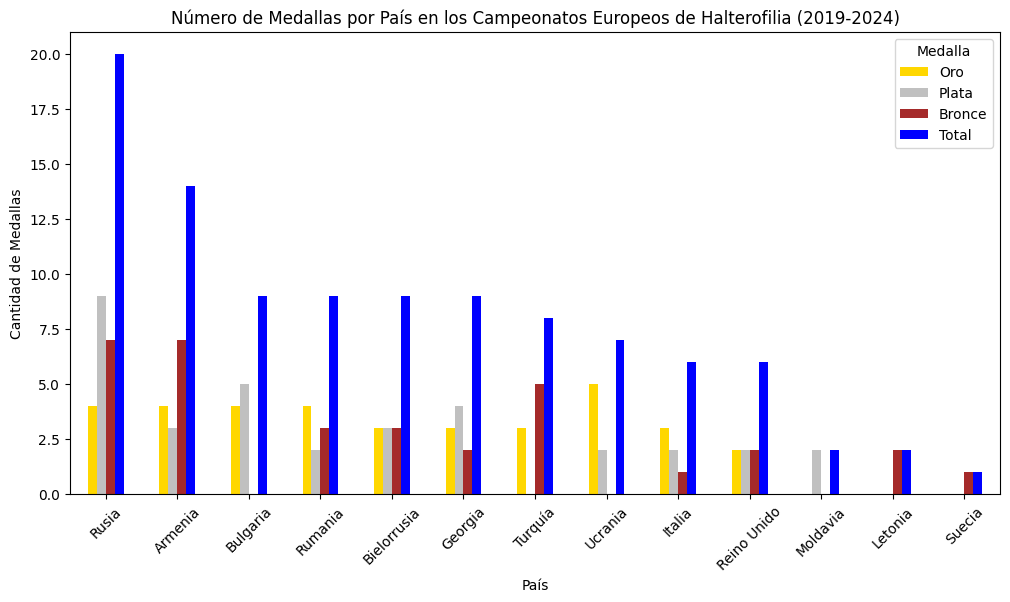

In [24]:
# Conteo de medallas  por país
oro_por_pais = df_clean[df_clean['Medalla'] == 'Oro']['País'].value_counts().head(10)

plata_por_pais = df_clean[df_clean['Medalla'] == 'Plata']['País'].value_counts().head(10)

bronce_por_pais = df_clean[df_clean['Medalla'] == 'Bronce']['País'].value_counts().head(10)

# Crear un DataFrame combinando los tres conteos
medallas_por_pais = pd.concat([oro_por_pais, plata_por_pais, bronce_por_pais], axis=1)

# Renombrar las columnas
medallas_por_pais.columns = ['Oro', 'Plata', 'Bronce']

# Llenar valores NaN con 0 (para países que no aparecen en alguna categoría)
medallas_por_pais = medallas_por_pais.fillna(0)

# Ordenar por el total de medallas
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)
medallas_por_pais = medallas_por_pais.sort_values(by='Total', ascending=False)


#gráfico de barras
medallas_por_pais.plot(kind='bar', figsize=(12, 6), color=['gold', 'silver', 'brown', 'blue'])

#títulos y etiquetas
plt.title('Número de Medallas por País en los Campeonatos Europeos de Halterofilia (2019-2024)')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.legend(title='Medalla')

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)


plt.show()


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [25]:
#Conteo de medallas por país y género
conteo_por_genero = df_clean.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#columnas para total y proporción de género
conteo_por_genero['Total'] = conteo_por_genero.sum(axis=1)
conteo_por_genero['Diferencia'] = abs(conteo_por_genero['Masculino'] - conteo_por_genero['Femenino'])

#Calcular proporción Femenino/Masculino (o viceversa)
conteo_por_genero['Proporcion'] = conteo_por_genero[['Femenino', 'Masculino']].min(axis=1) / \
                                  conteo_por_genero[['Femenino', 'Masculino']].max(axis=1)

#Ordenar por mayor proporción (más equitativo)
equidad = conteo_por_genero.sort_values(by='Proporcion', ascending=False)

print('Los países más equitativos son: Alemania, Azerbaiyán y Moldavia')

print('##################################################################')
# Mostrar top 10 países más equitativos
print(equidad[['Femenino', 'Masculino', 'Total', 'Proporcion']].head(10))

Los países más equitativos son: Alemania, Azerbaiyán y Moldavia
##################################################################
Genero       Femenino  Masculino  Total  Proporcion
País                                               
Alemania            1          1      2    1.000000
Azerbaiyán          1          1      2    1.000000
Moldavia            1          1      2    1.000000
Ucrania             5          3      8    0.600000
Italia              2          4      6    0.500000
Francia             2          1      3    0.500000
Turquía             3          6      9    0.500000
Letonia             1          2      3    0.500000
Bulgaria            3          7     10    0.428571
Bielorrusia         2          7      9    0.285714


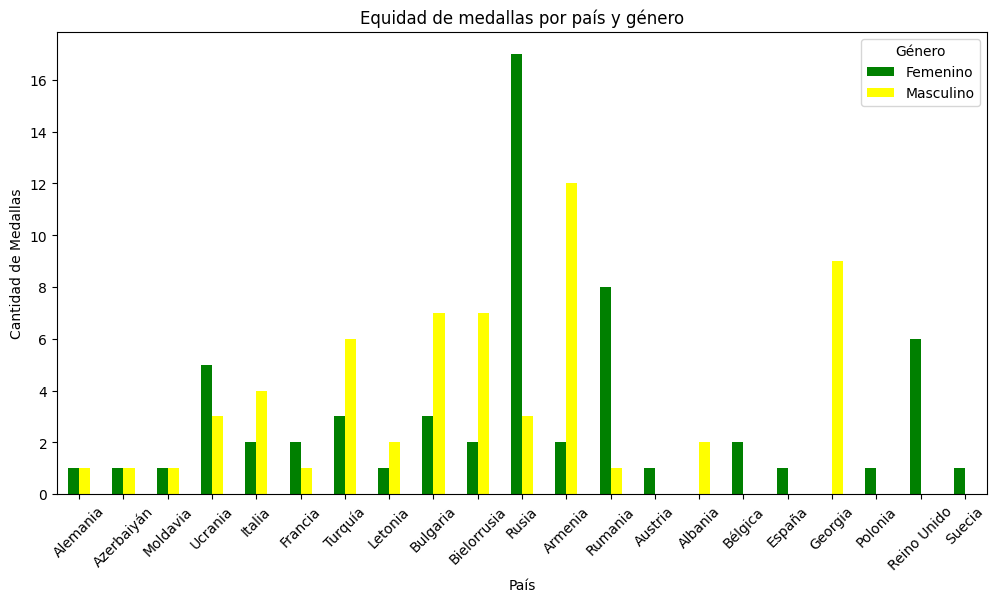

In [26]:
 #Crear el gráfico de barras agrupadas
equidad[['Femenino', 'Masculino']].plot(kind='bar', figsize=(12, 6), color=['green', 'yellow'])

# Agregar títulos y etiquetas
plt.title('Equidad de medallas por país y género')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.legend(title='Género')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


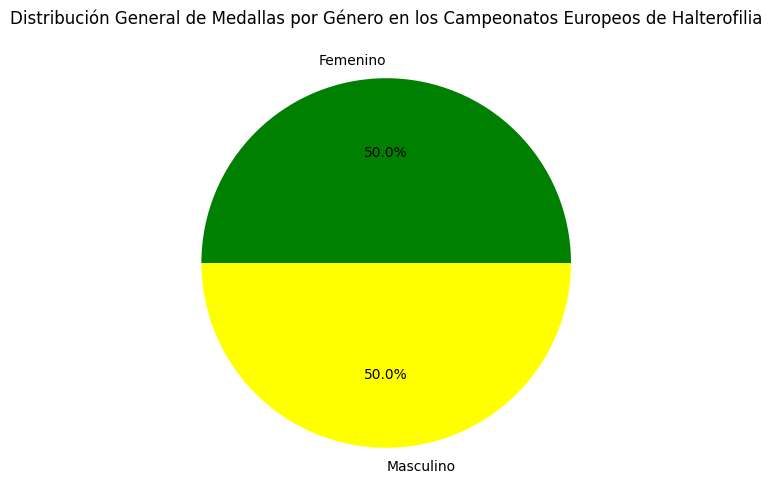

In [27]:
plt.figure(figsize=(8, 6))
equidad[['Femenino', 'Masculino']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow'])

plt.title('Distribución General de Medallas por Género en los Campeonatos Europeos de Halterofilia')
plt.ylabel('')  # Oculta etiqueta del eje Y

plt.show()


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [28]:
# # Promedio del total por país y género
promedios = df_clean.groupby(["País", "Genero"])["Total"].mean().unstack()

#Diferencia absoluta
promedios["Diferencia"] = abs(promedios["Masculino"] - promedios["Femenino"])

# País con menor diferencia
pais_con_menor_diferencia = promedios.sort_values("Diferencia").head(10)

#creación de la columna Total
promedios['Total'] = promedios['Masculino'] + promedios['Femenino']
print(pais_con_menor_diferencia)


Genero         Femenino   Masculino  Diferencia
País                                           
Rumania      213.000000  248.000000   35.000000
Alemania     222.000000  311.000000   89.000000
Francia      220.500000  312.000000   91.500000
Moldavia     245.000000  339.000000   94.000000
Ucrania      242.400000  348.333333  105.933333
Turquía      185.666667  293.833333  108.166667
Italia       198.500000  326.250000  127.750000
Letonia      221.000000  350.500000  129.500000
Bulgaria     155.000000  320.714286  165.714286
Bielorrusia  196.000000  362.428571  166.428571


C:\Users\santi\AppData\Local\Temp\ipykernel_36812\2361796848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedios.index, y=promedios["Diferencia"], palette="coolwarm")


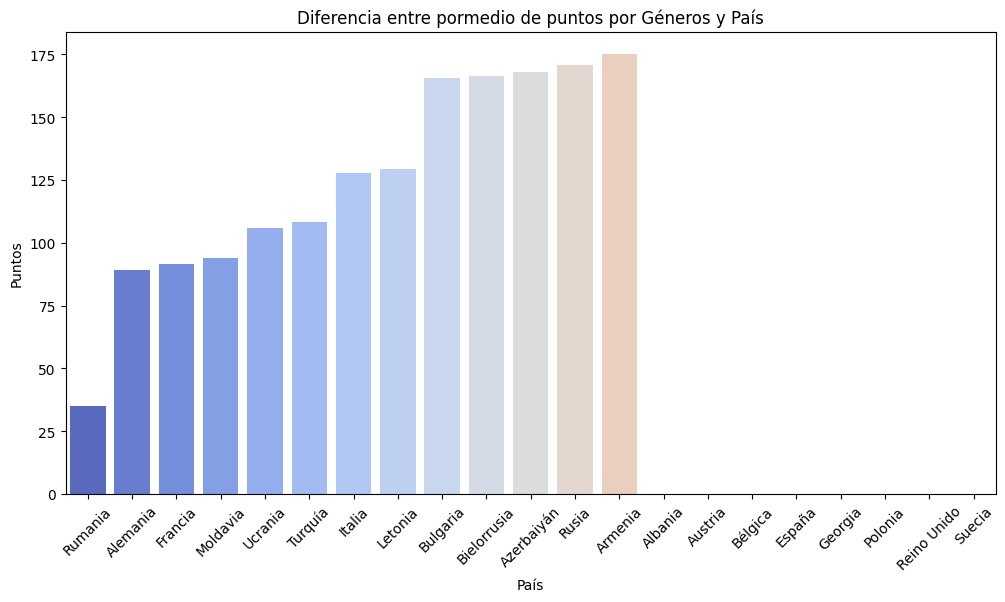

In [29]:
promedios = promedios.sort_values("Diferencia", ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios.index, y=promedios["Diferencia"], palette="coolwarm")

# Agregar títulos y etiquetas
plt.title("Diferencia entre pormedio de puntos por Géneros y País")
plt.xlabel("País")
plt.ylabel("Puntos")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [30]:
!pip install requests
import requests
from bs4 import BeautifulSoup
!pip install lxml


## Paso 2. Cargar datos

In [31]:
def extraer_resultados_europeo(urls):
    resultados = []

    for url in urls:
        try:
            # Leer todas las tablas
            tablas = pd.read_html(url)

            # Filtrar solamente las tablas de 4 columnas (únicas necesárias para el proyecto)
            for tabla in tablas:
                if tabla.shape[1] == 4 and tabla.shape[0] >= 5:
                    resultados.append(tabla)

        except Exception as e:
            print(f"Error al procesar {url}: {e}")
    
    return resultados

#ahora se guarda las 4 urls dentro de una lista y se ejecuta la función.
urls = [
    "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021",
    "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022",
    "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023",
    "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024"
]

resultados = extraer_resultados_europeo(urls)

# Ver cuántas tablas se extrajeron
print(f"Se extrajeron {len(resultados)} tablas de resultados.")
#ahora tenemos una lista llamada RESULTADOS

Se extrajeron 8 tablas de resultados.


In [32]:
for i, df in enumerate(resultados):
    print(f"Tabla {i}: {df.shape}")
## hay 2 tablas para cada año, primero masculino y luego femenino, pues fueran extraídas en este orden

Tabla 0: (10, 4)
Tabla 1: (10, 4)
Tabla 2: (10, 4)
Tabla 3: (10, 4)
Tabla 4: (10, 4)
Tabla 5: (10, 4)
Tabla 6: (10, 4)
Tabla 7: (10, 4)


In [33]:
# Lista de año y genero según el orden de extraccion
anios = [2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024]
sexos = ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino']

# Nuevas columnas estándar
nuevas_columnas = ['Evento', 'Oro', 'Plata', 'Bronce']

# Procesamos cada tabla
tablas_limpias = []
for i, df in enumerate(resultados):
    df.columns = nuevas_columnas
    df['Año'] = anios[i]
    df['Sexo'] = sexos[i]
    tablas_limpias.append(df)

In [34]:
# Convertir lista a un array de NumPy
resultados_array = np.array(resultados)  # Ahora sí tendrá `.shape`
print(resultados_array.shape)  # Verifica la forma del array

# Aplanar el array si tiene más de 2 dimensiones
resultados_2d = resultados_array.reshape(-1, resultados_array.shape[-1])

# Convertir a DataFrame
df_21_24 = pd.DataFrame(resultados_2d)
print(df_21_24.head())

(8, 10, 6)
               0                                             1  \
0  55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​   
1  61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296   
2  67 kg (05.04)       Muhammed Özbek Turquía  145 + 178 = 323   
3  73 kg (06.04)    Daniyar İsmayilov Turquía  160 + 181 = 341   
4  81 kg (07.04)    Antonino Pizzolato Italia  164 + 206 = 370   

                                               2  \
0  Valentin Iancu Rumania  108 + 140 = 248[n 1]​   
1     Shota Mishvelidze Georgia  135 + 155 = 290   
2            Mirko Zanni Italia  148 + 170 = 318   
3           Marin Robu Moldavia  156 + 183 = 339   
4         Karlos Nasar Bulgaria  163 + 206 = 369   

                                                  3     4          5  
0  Dmytro Voronovsky Ucrania  110 + 137 = 247[n 1]​  2021  Masculino  
1             Ferdi Hardal Turquía  130 + 157 = 287  2021  Masculino  
2       Valentin Guenchev Bulgaria  138 + 177 = 315  2021  Masculi

In [35]:
# Renombrar columnas usando una lista de nombres
df_21_24.columns = ['Evento', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
print(df_21_24.columns)

Index(['Evento', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero'], dtype='object')


In [36]:
df_21_24_clean = df_21_24.melt(
    id_vars=["Evento", "Año", "Genero"],     # columnas que se mantienen
    value_vars=["Oro", "Plata", "Bronce"], # columnas que se "derriten"
    var_name="Medalla",                    # nueva columna que indicará el tipo de medalla
    value_name="Atleta"                    # nueva columna con el nombre del atleta
)
df_21_24_clean.head(1)

,Evento,Año,Genero,Medalla,Atleta
0,55 kg (04.04),2021,Masculino,Oro,Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​


In [37]:
# expresion regular para eliminar los [n1] de la columna Atleta
df_21_24_clean['Atleta'] = df_21_24_clean['Atleta'].str.replace(r'\[n\s?\d+\]​?', '', regex=True)

 ### crear columnas: Nombre, Apellido, País, Arrancada, Dos tiempos, Total

In [38]:
# Aplicar la función extraer_info_atleta a cada fila de la columna "Atleta"
df_21_24_clean[['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']] = df_21_24_clean['Atleta'].apply(extraer_info_atleta)

# Verificar el resultado
print(df_21_24_clean.head())


          Evento   Año     Genero Medalla  \
0  55 kg (04.04)  2021  Masculino     Oro   
1  61 kg (04.04)  2021  Masculino     Oro   
2  67 kg (05.04)  2021  Masculino     Oro   
3  73 kg (06.04)  2021  Masculino     Oro   
4  81 kg (07.04)  2021  Masculino     Oro   

                                       Atleta    Nombre   Apellido      País  \
0      Anguel Rusev Bulgaria  111 + 147 = 258    Anguel      Rusev  Bulgaria   
1   Stilian Grozdev Bulgaria  136 + 160 = 296   Stilian    Grozdev  Bulgaria   
2     Muhammed Özbek Turquía  145 + 178 = 323  Muhammed      Özbek   Turquía   
3  Daniyar İsmayilov Turquía  160 + 181 = 341   Daniyar  İsmayilov   Turquía   
4  Antonino Pizzolato Italia  164 + 206 = 370  Antonino  Pizzolato    Italia   

   Arrancada  Dos_tiempos  Total  
0        111          147    258  
1        136          160    296  
2        145          178    323  
3        160          181    341  
4        164          206    370  


In [39]:
# Extraer el valor de fecha entre paréntesis (como "06.04") desde la columna Eventos
df_21_24_clean['Fecha_str'] = df_21_24_clean['Evento'].str.extract(r'\((\d{2}\.\d{2})\)')
# Combinar el año con ese día y mes, y convertir a datetime
df_21_24_clean['Fecha'] = pd.to_datetime(
    df_21_24_clean['Año'].astype(str) + '-' + df_21_24_clean['Fecha_str'],
    format='%Y-%d.%m',
    errors='coerce'  # coerce pone NaT si no puede convertir
)

df_21_24_clean['Categoría'] = df_21_24_clean['Evento'].str.extract(r'(\+?\d+)\s*kg')

In [40]:
df_21_24_clean = df_21_24_clean.drop(columns=['Año', 'Atleta', 'Evento', 'Fecha_str'])

## Paso 3. Exploración inicial

In [41]:
#check_df(df_21_24_clean)
#id_valores_problem(df_21_24_clean)

## Paso 4. Crear un único dataframe con los datos de 2019, 2020, 2021, 2022, 2023 y 2024

In [42]:
## se realizará más adelante en el paso 9

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [43]:
## ya se realizó anteriormente
df_21_24_clean.head(1)

,Genero,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total,Fecha,Categoría
0,Masculino,Oro,Anguel,Rusev,Bulgaria,111,147,258,2021-04-04,55


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [44]:
## ya se realizó anteriormente
df_21_24_clean.head(1)

,Genero,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total,Fecha,Categoría
0,Masculino,Oro,Anguel,Rusev,Bulgaria,111,147,258,2021-04-04,55


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [45]:
nuevo_orden1 = ['Genero','Categoría', 'Fecha','Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']
df_21_24_clean = df_21_24_clean[nuevo_orden1]
#cambiar la orden de las columnas
df_21_24_clean.head(1)

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55,2021-04-04,Oro,Anguel,Rusev,Bulgaria,111,147,258


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [46]:
# Lista de columnas que queremos convertir a tipo 'category'
columnas_a_category = ['Categoría', 'Medalla']

# Aplicamos la conversión usando .astype('category')
for col in columnas_a_category:
    df_21_24_clean[col] = df_21_24_clean[col].astype('category')

    # Lista de columnas que queremos convertir a tipo int
columnas_a_int = ['Arrancada', 'Dos_tiempos', 'Total']

# Aplicamos la conversión usando .astype(Int64)
for col in columnas_a_int:
    df_21_24_clean[col] = df_21_24_clean[col].astype('Int64')

In [47]:
df_21_24_clean.dtypes

Genero                 object
Categoría            category
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               Int64
Dos_tiempos             Int64
Total                   Int64
dtype: object

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [48]:
## el dataframe ya fue ordenado en el paso 7

In [49]:
df_final = pd.concat([df_clean, df_21_24_clean], ignore_index=True)
df_final

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
355,Femenino,71,2024-02-16,Bronce,Lisa,Marie Schweizer,Alemania,107,124,231
356,Femenino,76,2024-02-17,Bronce,Lara,Dancz,Alemania,101,114,215
357,Femenino,81,2024-02-18,Bronce,Dilara,Narin,Turquía,97,125,222
358,Femenino,87,2024-02-19,Bronce,Hripsime,Jurshudian,Armenia,105,122,227


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [50]:
check_df(df_final)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 360 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
355,Femenino,71,2024-02-16,Bronce,Lisa,Marie Schweizer,Alemania,107,124,231
356,Femenino,76,2024-02-17,Bronce,Lara,Dancz,Alemania,101,114,215
357,Femenino,81,2024-02-18,Bronce,Dilara,Narin,Turquía,97,125,222
358,Femenino,87,2024-02-19,Bronce,Hripsime,Jurshudian,Armenia,105,122,227
359,Femenino,+87,2024-02-20,Bronce,Fatmagül,Çevik,Turquía,107,131,238



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
128,Masculino,109,2021-04-10,Oro,Dmytro,Chumak,Ucrania,181,226,407
57,Femenino,81,2019-04-12,Plata,Anna,Van Bellinghen,Bélgica,103,118,221
261,Masculino,61,2024-02-13,Plata,Ivan,Dimov,Bulgaria,130,150,280
235,Femenino,71,2022-06-01,Plata,Lisa,Marie Schweizer,Alemania,103,120,223
188,Masculino,109,2024-02-19,Oro,Dadaş,Dadaşbəyli,Azerbaiyán,176,212,388



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Genero                 object
Categoría              object
Fecha          datetime64[ns]
Medalla                object
Nombre                 object
Apellido               object
País                   object
Arrancada               Int64
Dos_tiempos             Int64
Total                   Int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            6
Int64             3
datetime64[ns]    1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Arrancada', 'Dos_tiempos', 'Total']

########################################################################################
¿Cuáles son las variables cat

,Arrancada,Dos_tiempos,Total
count,360.0,360.0,360.0
mean,128.516667,155.844444,284.644444
std,37.967436,45.020679,82.157985
min,65.0,11.0,150.0
25%,99.0,121.0,221.0
50%,114.0,140.5,253.0
75%,163.0,196.5,364.0
max,222.0,263.0,485.0



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Genero,Categoría,Medalla,Nombre,Apellido,País
count,360,360,360,360,360,360
unique,2,18,3,151,171,27
top,Masculino,55,Oro,Anastasiya,Martirosian,Armenia
freq,180,36,120,14,6,52


In [51]:
id_valores_problem(df_final)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Genero         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos_tiempos    0.0
Total          0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "Arrancada": 0
Número de outliers en la columna "Dos_tiempos": 0
Número de outliers en la columna "Total": 0
###################################################################################


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

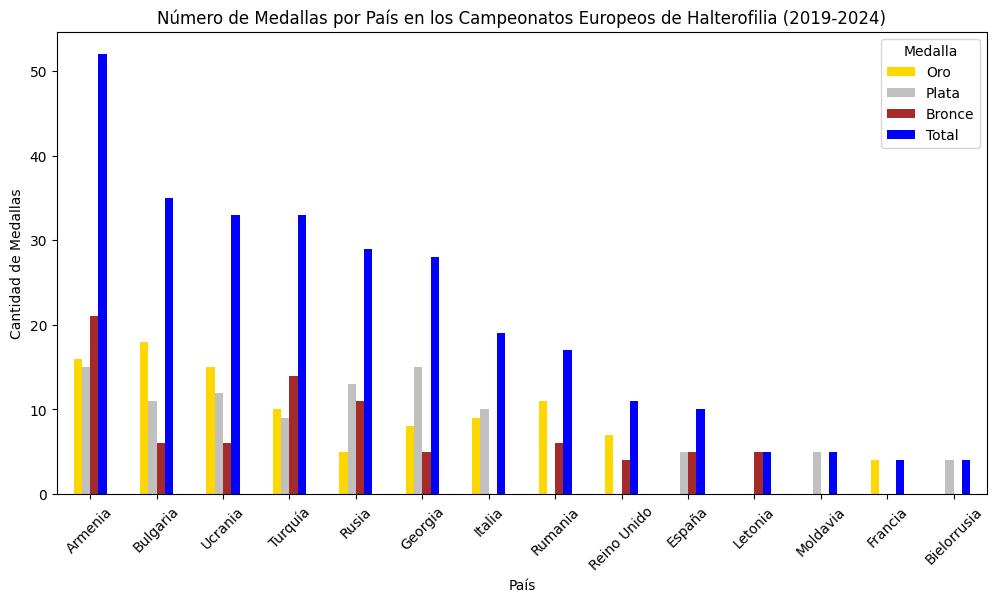

In [52]:
# Conteo de medallas  por país
oro_por_pais = df_final[df_final['Medalla'] == 'Oro']['País'].value_counts().head(10)

plata_por_pais = df_final[df_final['Medalla'] == 'Plata']['País'].value_counts().head(10)

bronce_por_pais = df_final[df_final['Medalla'] == 'Bronce']['País'].value_counts().head(10)

# Crear un DataFrame combinando los tres conteos
medallas_por_pais = pd.concat([oro_por_pais, plata_por_pais, bronce_por_pais], axis=1)

# Renombrar las columnas
medallas_por_pais.columns = ['Oro', 'Plata', 'Bronce']

# Llenar valores NaN con 0 (para países que no aparecen en alguna categoría)
medallas_por_pais = medallas_por_pais.fillna(0)

# Ordenar por el total de medallas
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)
medallas_por_pais = medallas_por_pais.sort_values(by='Total', ascending=False)


#gráfico de barras
medallas_por_pais.plot(kind='bar', figsize=(12, 6), color=['gold', 'silver', 'brown', 'blue'])

#títulos y etiquetas
plt.title('Número de Medallas por País en los Campeonatos Europeos de Halterofilia (2019-2024)')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.legend(title='Medalla')

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)


plt.show()


In [53]:
df_21_24_clean.columns

Index(['Genero', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País',
       'Arrancada', 'Dos_tiempos', 'Total'],
      dtype='object')

In [54]:
medallas_por_pais

,Oro,Plata,Bronce,Total
País,,,,
Armenia,16.0,15.0,21.0,52.0
Bulgaria,18.0,11.0,6.0,35.0
Ucrania,15.0,12.0,6.0,33.0
Turquía,10.0,9.0,14.0,33.0
Rusia,5.0,13.0,11.0,29.0
Georgia,8.0,15.0,5.0,28.0
Italia,9.0,10.0,0.0,19.0
Rumania,11.0,0.0,6.0,17.0
Reino Unido,7.0,0.0,4.0,11.0


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [55]:
#Conteo de medallas por país y género
conteo_por_genero = df_final.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#columnas para total y proporción de género
conteo_por_genero['Total'] = conteo_por_genero.sum(axis=1)
conteo_por_genero['Diferencia'] = abs(conteo_por_genero['Masculino'] - conteo_por_genero['Femenino'])

#Calcular proporción Femenino/Masculino (o viceversa)
conteo_por_genero['Proporcion'] = conteo_por_genero[['Femenino', 'Masculino']].min(axis=1) / \
                                  conteo_por_genero[['Femenino', 'Masculino']].max(axis=1)

#Ordenar por mayor proporción (más equitativo)
equidad = conteo_por_genero.sort_values(by='Proporcion', ascending=False)
print(f'El país con mayor equidad entre sus atletas és Turquía')
print('##################################################################')
# Mostrar top 10 países más equitativos
print(equidad[['Femenino', 'Masculino', 'Total', 'Proporcion']].head(30))

El país con mayor equidad entre sus atletas és Turquía
##################################################################
Genero       Femenino  Masculino  Total  Proporcion
País                                               
Turquía            18         15     33    0.833333
Moldavia            4          5      9    0.800000
Alemania            4          3      7    0.750000
Italia              9         13     22    0.692308
España              4          6     10    0.666667
Azerbaiyán          2          3      5    0.666667
Letonia             3          5      8    0.600000
1]​                 1          3      4    0.333333
Albania             1          4      5    0.250000
Bielorrusia         2          8     10    0.250000
Ucrania            27          6     33    0.222222
Francia             9          2     11    0.222222
Polonia             5          1      6    0.200000
Armenia             8         44     52    0.181818
Bulgaria            5         30     35    0.1

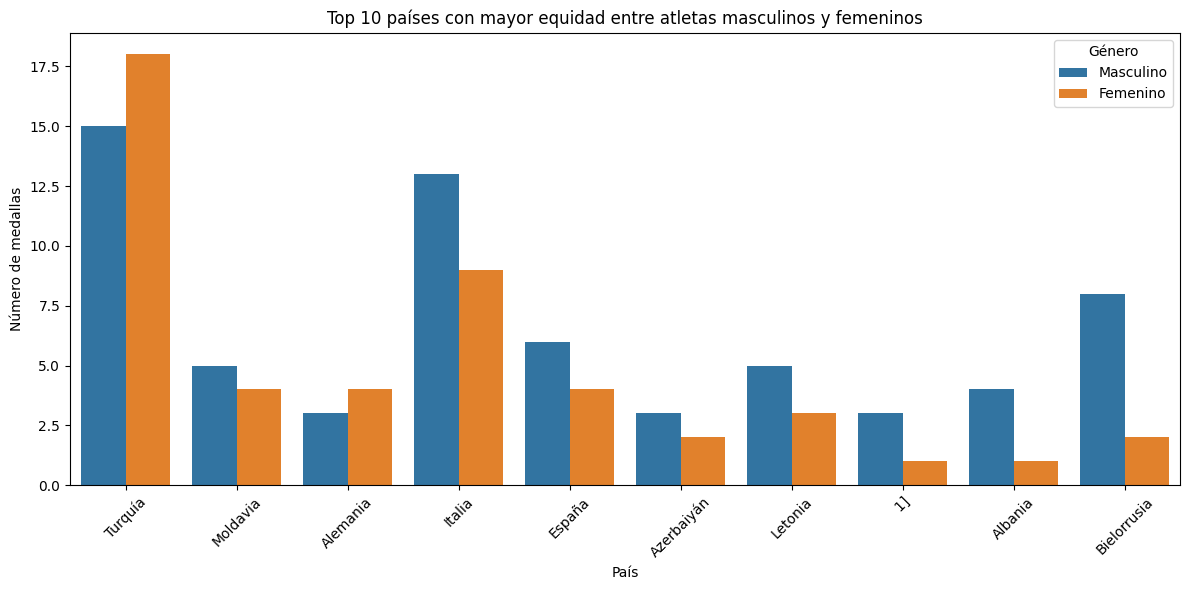

In [56]:
# Paso 1: Tomar el top 10 países más equitativos
top10 = equidad.head(10).reset_index()

# Paso 2: Transformar el DataFrame a formato largo para seaborn
df_long = top10.melt(id_vars='País', value_vars=['Masculino', 'Femenino'],
                     var_name='Genero', value_name='Medallas')

# Paso 3: Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='País', y='Medallas', hue='Genero')

# Paso 4: Personalización
plt.title('Top 10 países con mayor equidad entre atletas masculinos y femeninos')
plt.xlabel('País')
plt.ylabel('Número de medallas')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [57]:
# Paso 1: Calcular el promedio del total de puntos por país y género
promedios = df_final.groupby(['País', 'Genero'])['Total'].mean().unstack()

# Paso 2: Eliminar países que no tienen ambos géneros (para poder comparar)
promedios = promedios.dropna()

# Paso 3: Calcular la diferencia absoluta
promedios['Diferencia'] = abs(promedios['Masculino'] - promedios['Femenino'])

# Paso 4: Ordenar por menor diferencia
equidad_puntos = promedios.sort_values(by='Diferencia')

print('El país con menor diferencia entre el promedio de puntos totales es Rumania')
print('############################################################################')

# Mostrar los 10 países con menor diferencia de rendimiento promedio
print(equidad_puntos[['Masculino', 'Femenino', 'Diferencia']].head(1))




El país con menor diferencia entre el promedio de puntos totales es Rumania
############################################################################
Genero   Masculino    Femenino  Diferencia
País                                      
Rumania      247.0  209.277778   37.722222


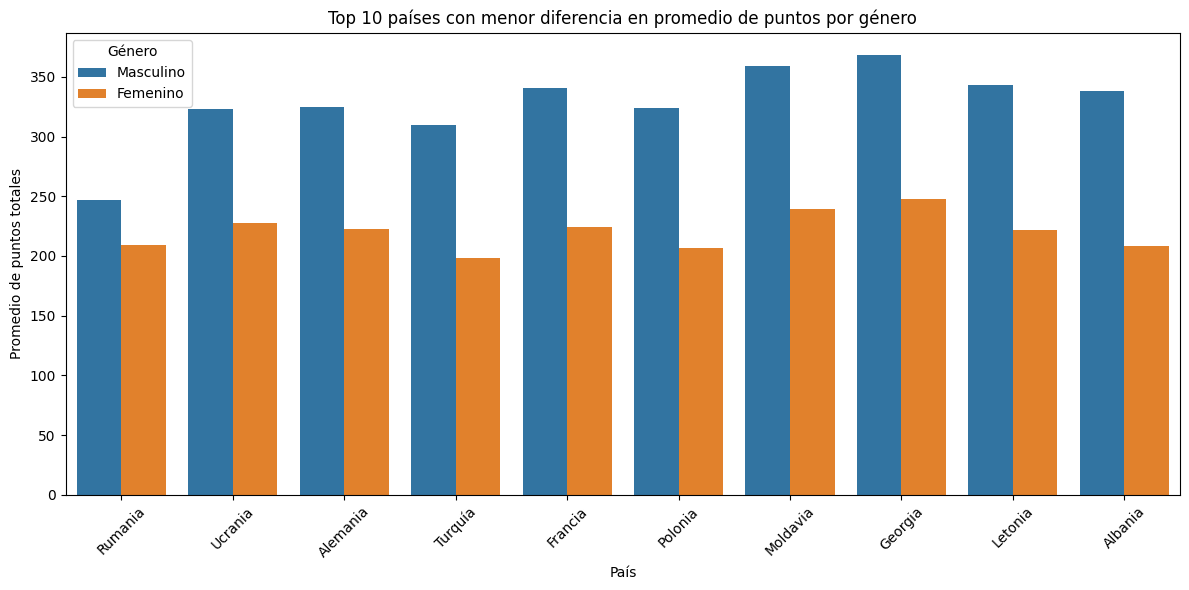

In [58]:
# Preparar para gráfico
top_paises = equidad_puntos.head(10).reset_index()
df_puntos = top_paises.melt(id_vars='País', value_vars=['Masculino', 'Femenino'],
                            var_name='Genero', value_name='Promedio_Total')

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_puntos, x='País', y='Promedio_Total', hue='Genero')

plt.title('Top 10 países con menor diferencia en promedio de puntos por género')
plt.xlabel('País')
plt.ylabel('Promedio de puntos totales')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()